# import modules

In [1]:
import glob
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1_draft import *

# super contour data

In [2]:
file_pattern = "../data/TACC_super_contour_mcz30_?_2024-05-14_*.pkl"
files = glob.glob(file_pattern)

data = {}

for file in files:
    with open(file, "rb") as f:
        file = pickle.load(f)
        data.update(file)

In [3]:
data = get_super_contour_stats_ver1(data)
data

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
with open("../data/super_contour_NP_L_mcz30_2024-05-20_18-36-54.pkl", "rb") as f:
    data_NP_L = pickle.load(f)

data_NP_L

{0.011418: {0.008404: {'epsilon': 0.002121619838123423},
  0.009028: {'epsilon': 0.0022813431446564447},
  0.009709: {'epsilon': 0.002455778181149282},
  0.010453: {'epsilon': 0.0026465076505403085},
  0.011267: {'epsilon': 0.0028553059120726143},
  0.012157: {'epsilon': 0.0030841641984294954},
  0.013134: {'epsilon': 0.00333531928584907},
  0.014207: {'epsilon': 0.0036112860742513186},
  0.015386: {'epsilon': 0.003914894581608319},
  0.016683: {'epsilon': 0.0042493319026939425},
  0.018113: {'epsilon': 0.004618189723482824},
  0.019692: {'epsilon': 0.005025518013833663},
  0.021437: {'epsilon': 0.0054758855353193026},
  0.023369: {'epsilon': 0.005974447787661763},
  0.02551: {'epsilon': 0.006527022961455908},
  0.027886: {'epsilon': 0.007140176346211002},
  0.030528: {'epsilon': 0.007821313433059363},
  0.033469: {'epsilon': 0.008578781612577191},
  0.036747: {'epsilon': 0.009421979848724615},
  0.040408: {'epsilon': 0.010361474941906867},
  0.044501: {'epsilon': 0.011409121888539375}

# super contours

In [ ]:
td_arr = np.sort(np.array([k for k in data.keys()]))
I_arr = np.sort(data[td_arr[0]]["I_arr"])
X, Y = np.meshgrid(td_arr, I_arr)
src_params = data[td_arr[0]]["source_params"]

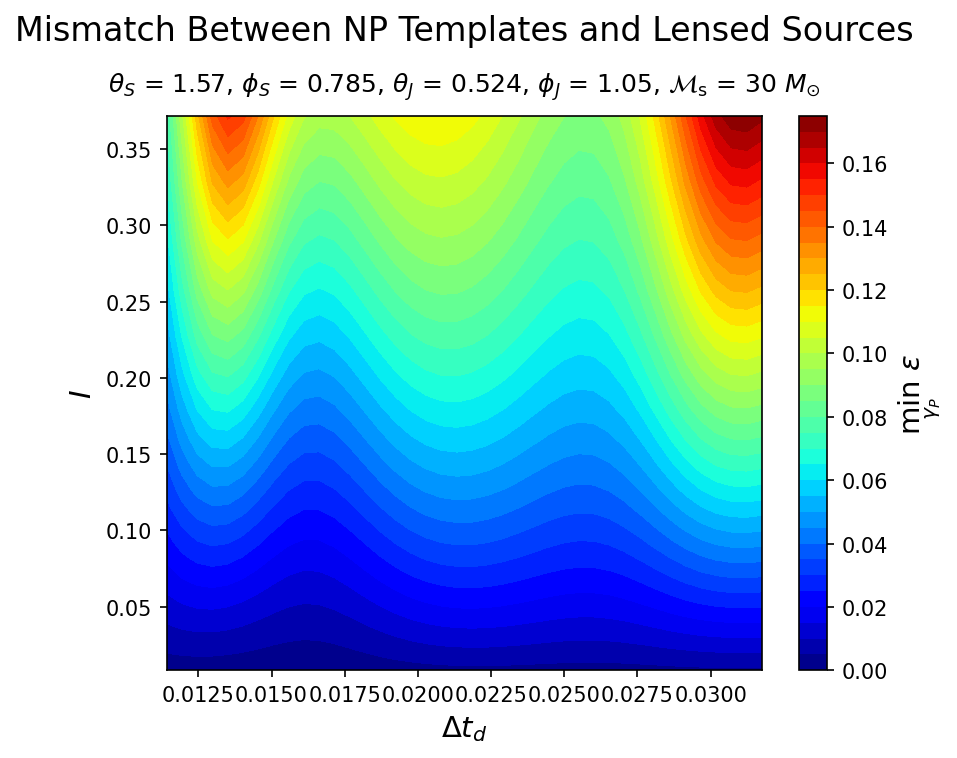

In [ ]:
ep_NP_L_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_NP_L_mtx[r, c] = data_NP_L[td][I]["epsilon"]

plt.contourf(X, Y, ep_NP_L_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Mismatch Between NP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

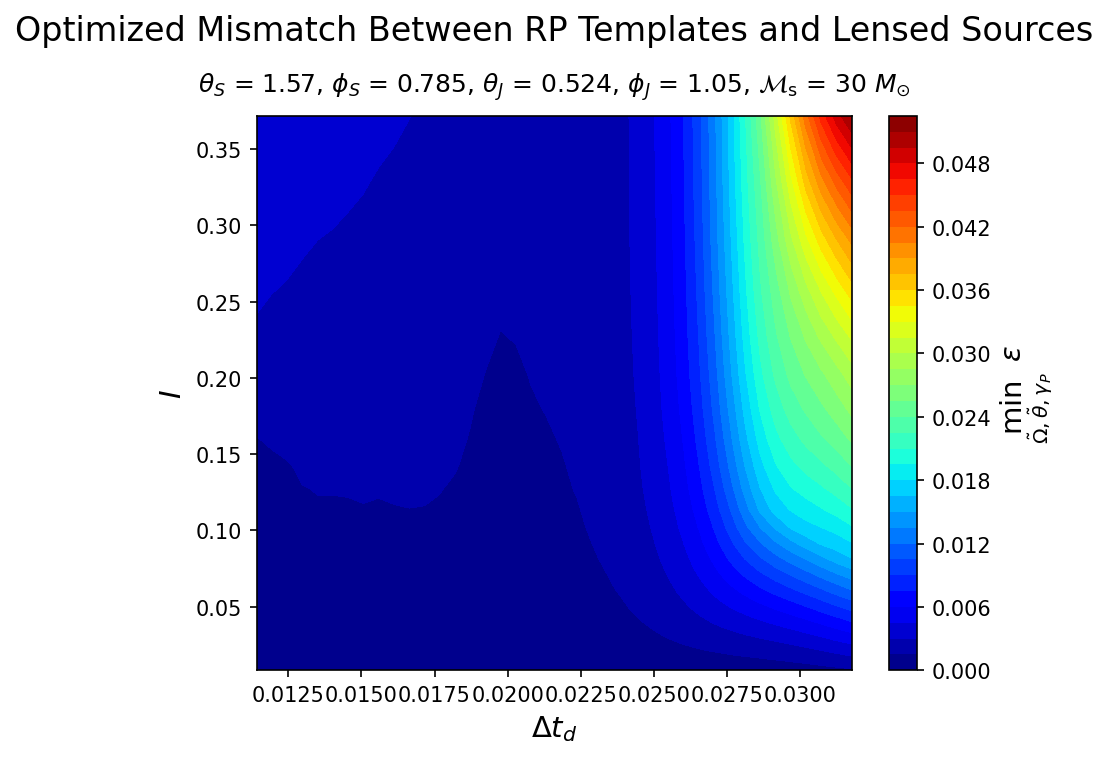

In [ ]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

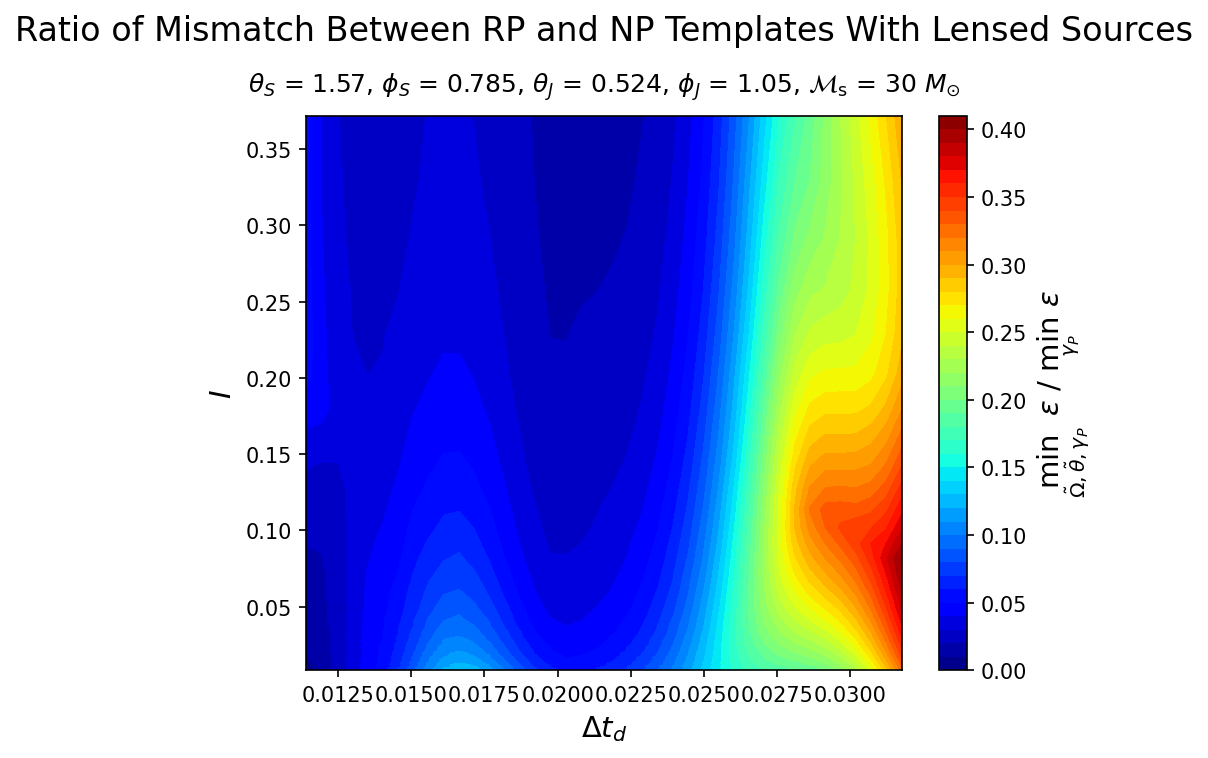

In [ ]:
# create a contour that shows the ratio between the two above
ep_ratio_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_ratio_mtx[r, c] = ep_min_mtx[r, c] / ep_NP_L_mtx[r, c]

plt.contourf(X, Y, ep_ratio_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$ / $\min_{\gamma_P}$ $\epsilon$",
    size=14,
)
plt.suptitle(
    "Ratio of Mismatch Between RP and NP Templates With Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

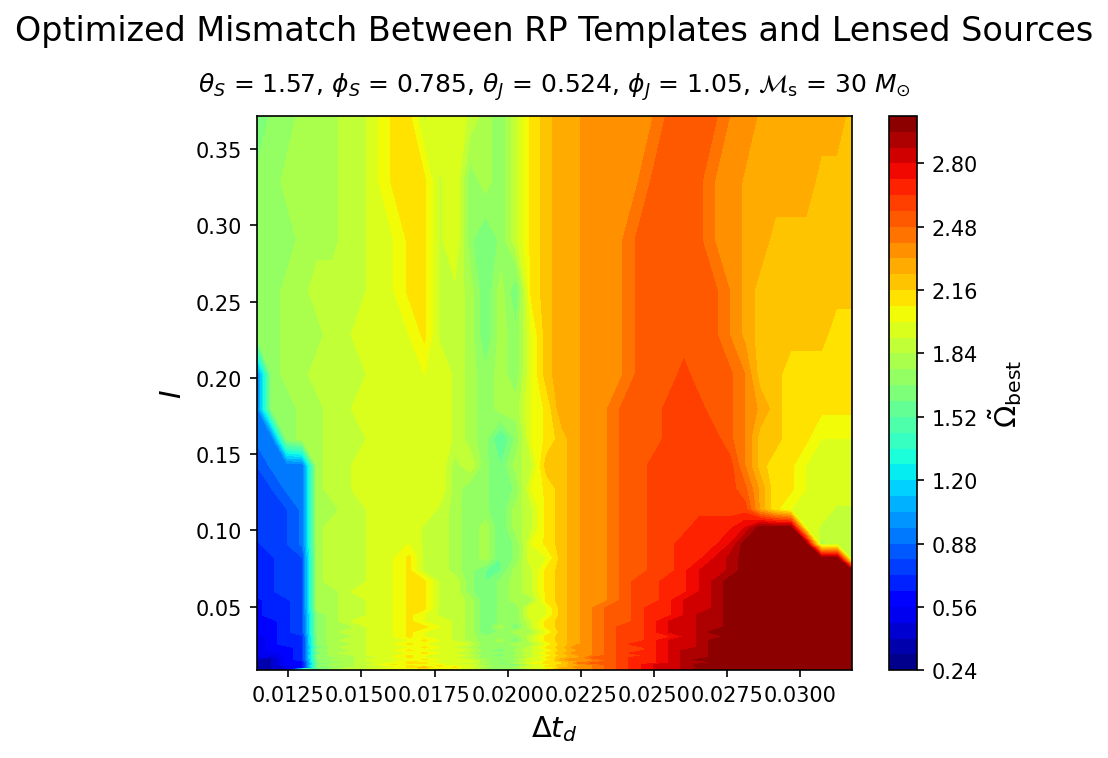

In [ ]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

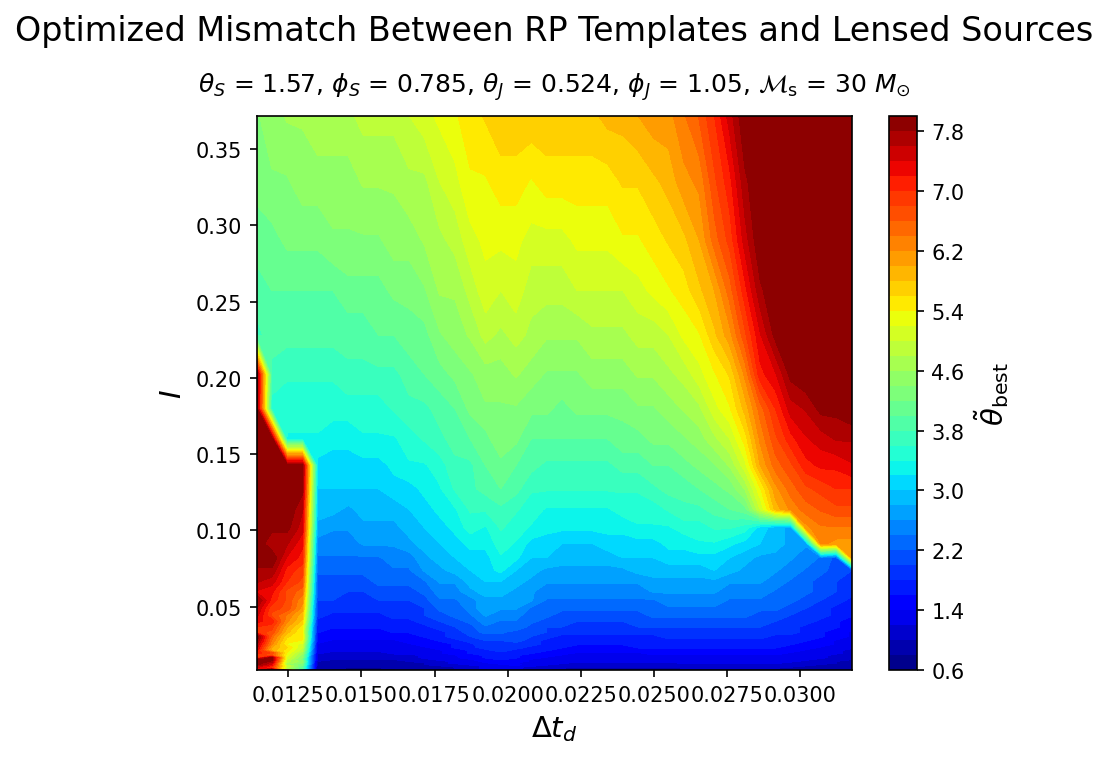

In [ ]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

# as a function of $\Delta t_d$ while fixing $I$

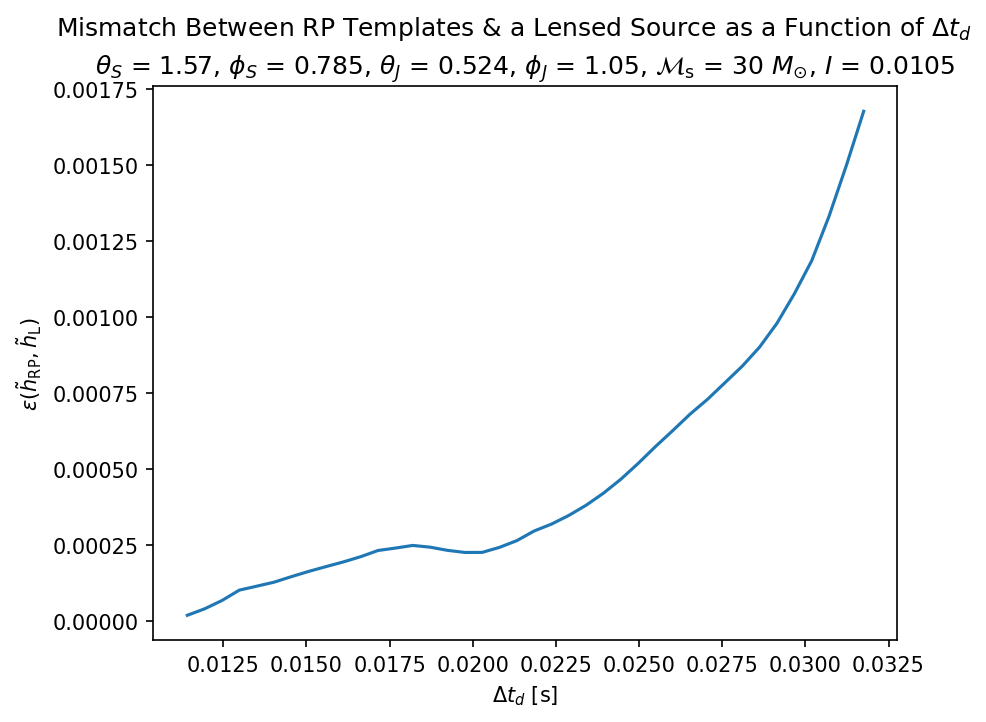

In [ ]:
r = 3
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [4]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_err_mtx[y, x] = data[td][I]["stats"]["omega_tilde_err"]

omega_err_arr = omega_err_mtx[r, :]

NameError: name 'best_omega_mtx' is not defined

In [5]:
print(omega_err_arr)

NameError: name 'omega_err_arr' is not defined

In [6]:
plt.errorbar(
    td_arr,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

NameError: name 'td_arr' is not defined

In [18]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

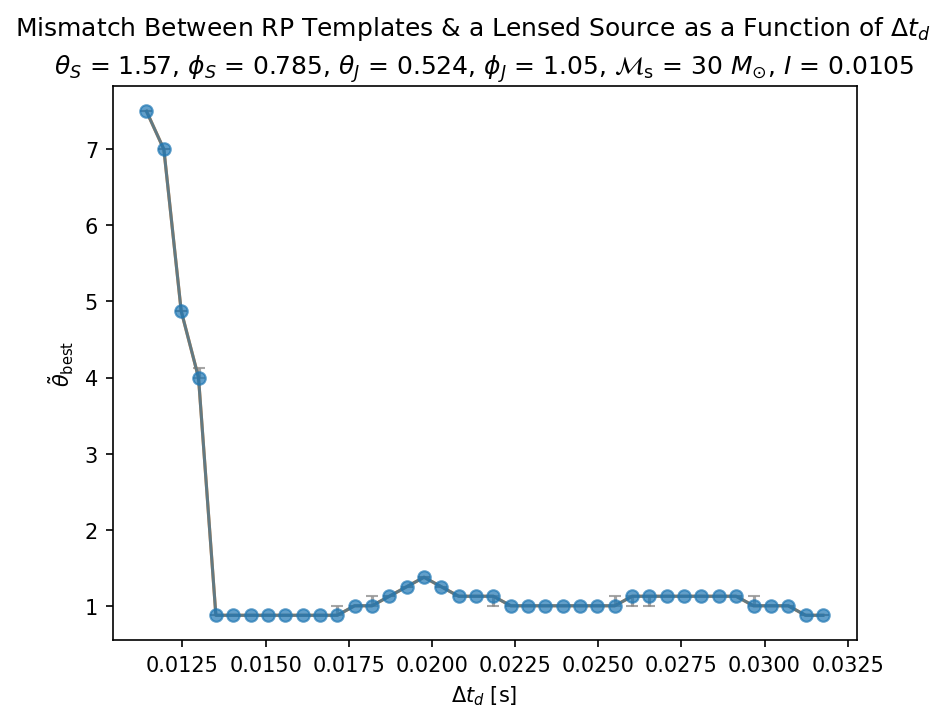

In [19]:
plt.errorbar(
    td_arr,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.plot(td_arr, td_best_theta_arr, label=r"$\~{\theta}_{\rm best}$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

IntSlider(value=0, description='td index:', max=39)

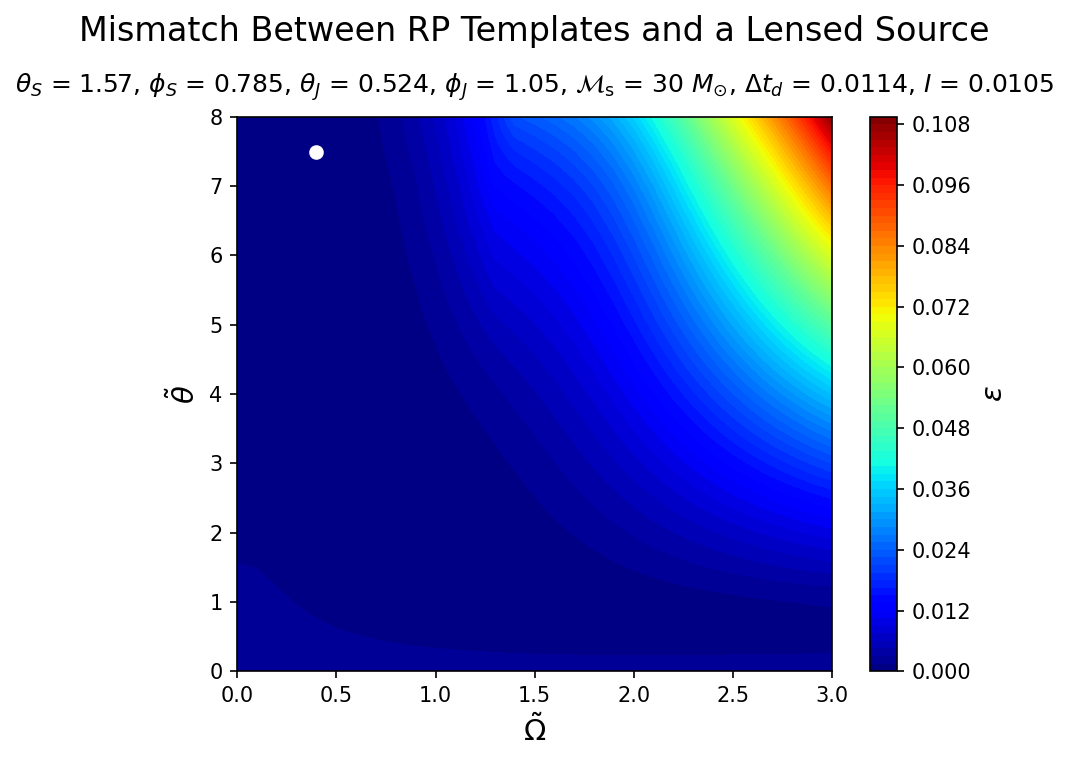

In [15]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
td_slider = widgets.IntSlider(
    min=0, max=len(td_arr) - 1, step=1, value=0, description="td index:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = td_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td], I_arr[r])


td_slider.observe(update_plot, names="value")

# as a function of $I$ while fixing $\Delta t_d$

In [21]:
c = 30
data_I = data[td_arr[c]]

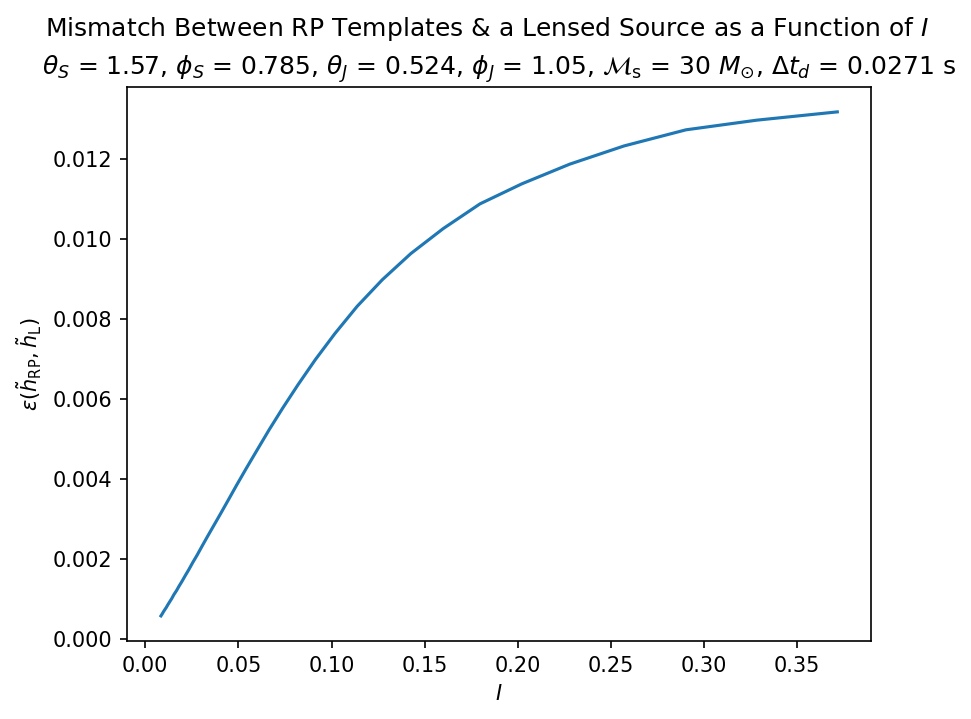

In [22]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

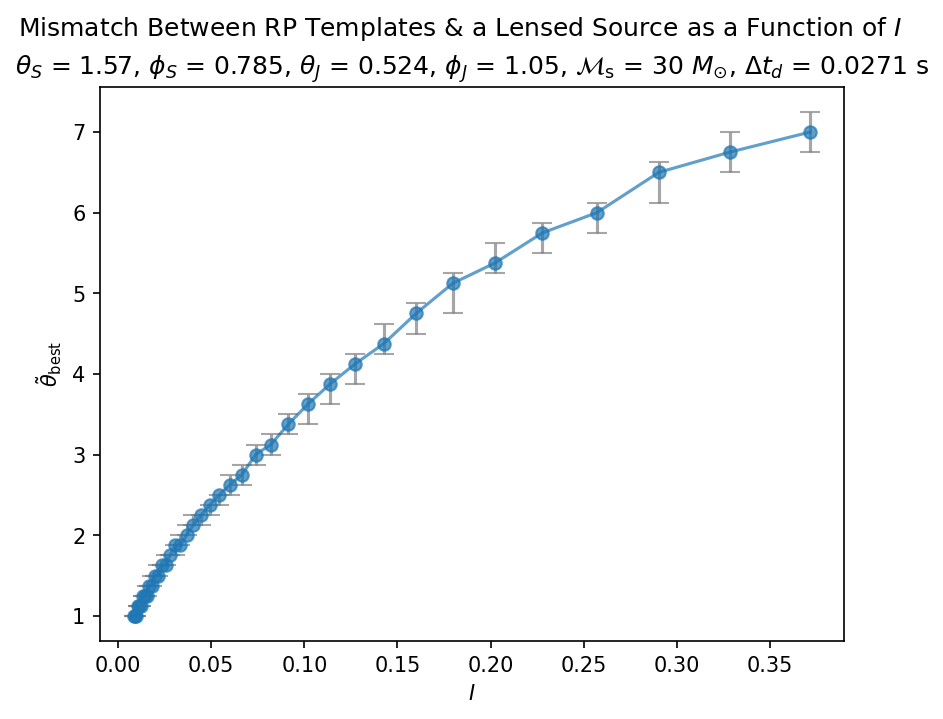

In [23]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

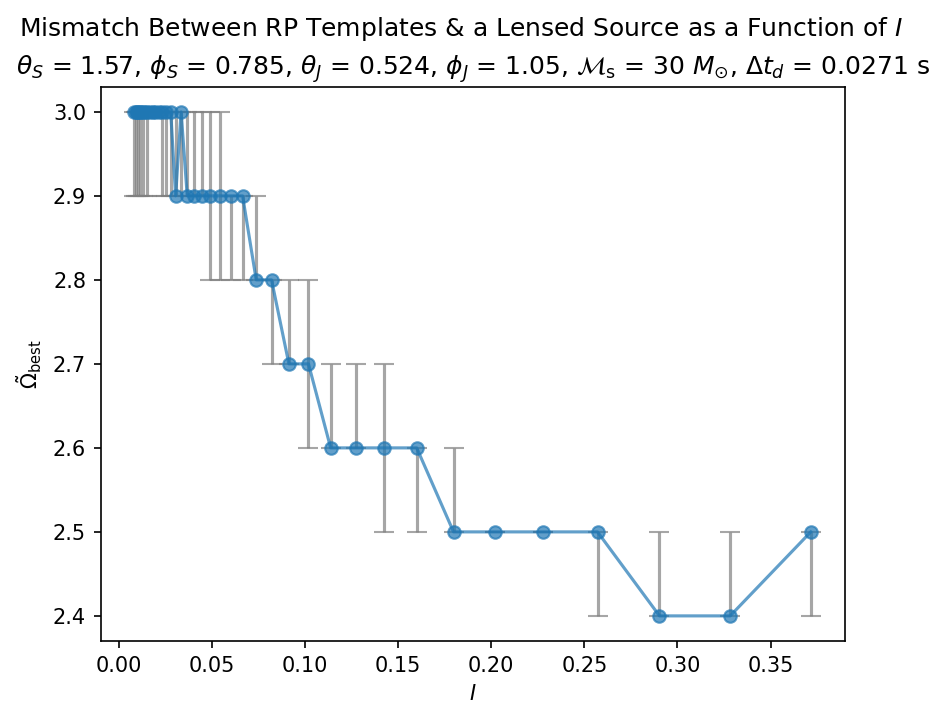

In [24]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

IntSlider(value=37, description='I index:', max=39)

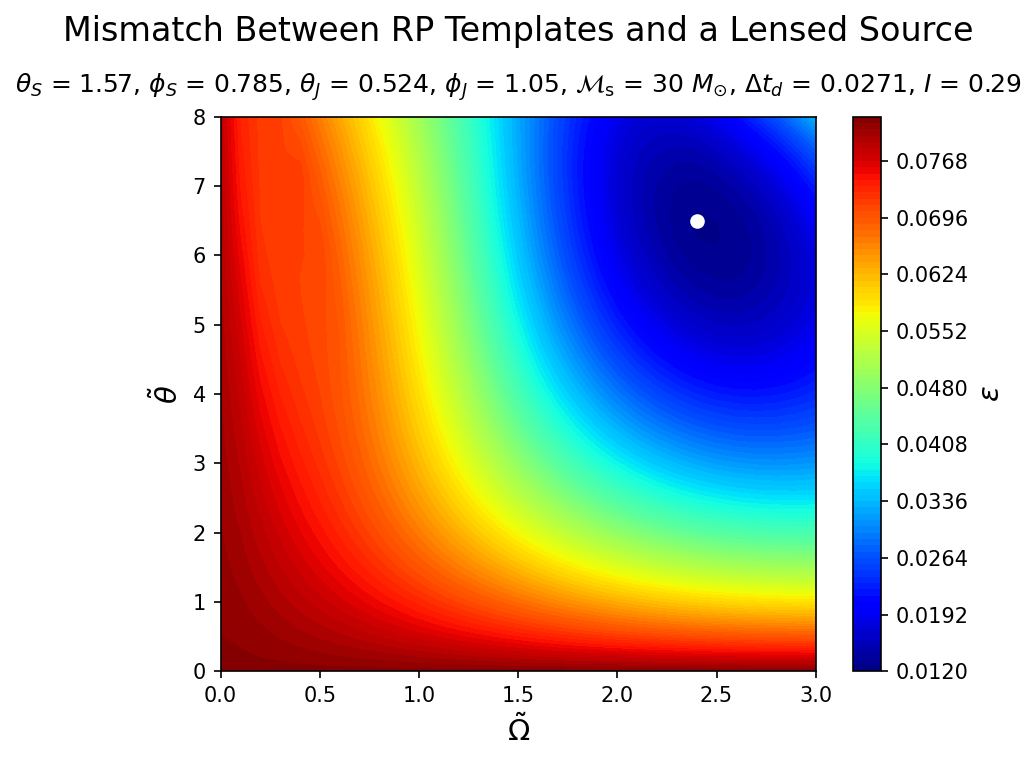

In [25]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
I_slider = widgets.IntSlider(
    min=0, max=len(I_arr) - 1, step=1, value=0, description="I index:"
)
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = I_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td_arr[c]], I)  # type: ignore


I_slider.observe(update_plot, names="value")

# waveform comparison

In [ ]:
data_td = {}
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = data_td["MLz_arr"]
td_arr = data_td["td_arr"]

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()